In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_data = pd.read_csv(url)

# Display the first few rows
print("First 5 rows of the dataset:")
print(covid_data.head())

# Explore the structure
print("\nDataset info:")
print(covid_data.info())

# Check for missing values
print("\nMissing values per column:")
print(covid_data.isnull().sum())

# Clean the dataset
key_columns = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
               'population', 'continent']
covid_clean = covid_data[key_columns].dropna(subset=['total_cases', 'new_cases', 'continent'])

# Convert date to datetime format
covid_clean['date'] = pd.to_datetime(covid_clean['date'])

print("\nAfter cleaning, dataset shape:", covid_clean.shape)

First 5 rows of the dataset:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  

In [3]:
# Basic statistics for numerical columns
print("Basic statistics for numerical columns:")
print(covid_clean.describe())

# Group by continent and calculate mean new cases
continent_stats = covid_clean.groupby('continent').agg({
    'new_cases': 'mean',
    'new_deaths': 'mean',
    'population': 'mean'
}).reset_index()

print("\nAverage new cases and deaths by continent:")
print(continent_stats)

# Calculate cases per capita
covid_clean['cases_per_capita'] = covid_clean['total_cases'] / covid_clean['population']
covid_clean['deaths_per_capita'] = covid_clean['total_deaths'] / covid_clean['population']

# Find countries with highest cases per capita
top_countries = covid_clean.groupby('location')['cases_per_capita'].max().sort_values(ascending=False).head(10)
print("\nCountries with highest cases per capita:")
print(top_countries)

# Interesting finding: Early in the pandemic, there was a strong correlation between testing capacity and reported cases
# This led to some wealthier countries appearing to have higher infection rates

Basic statistics for numerical columns:
                                date   total_cases     new_cases  \
count                         390071  3.900710e+05  3.900710e+05   
mean   2022-04-17 20:38:59.647910656  1.624900e+06  1.989215e+03   
min              2020-01-05 00:00:00  0.000000e+00  0.000000e+00   
25%              2021-02-24 00:00:00  5.507000e+03  0.000000e+00   
50%              2022-04-17 00:00:00  4.956800e+04  0.000000e+00   
75%              2023-06-08 00:00:00  5.448030e+05  0.000000e+00   
max              2024-08-04 00:00:00  1.034368e+08  4.047548e+07   
std                              NaN  6.880653e+06  8.585827e+04   

       total_deaths     new_deaths    population  
count  3.900710e+05  390059.000000  3.900710e+05  
mean   1.874677e+04      17.922478  3.351155e+07  
min    0.000000e+00       0.000000  4.700000e+01  
25%    3.700000e+01       0.000000  3.729030e+05  
50%    6.490000e+02       0.000000  5.434324e+06  
75%    7.118000e+03       0.000000  2.183

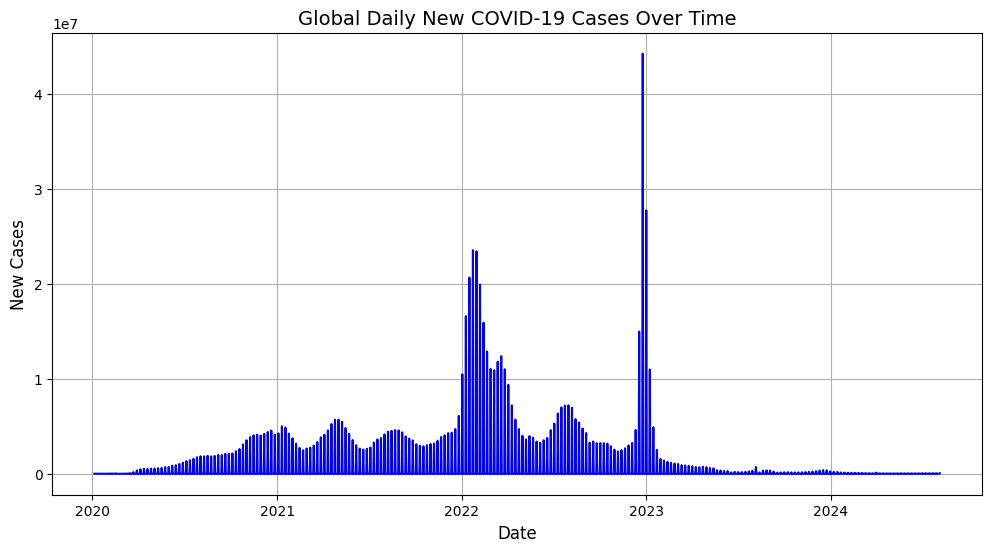

In [4]:
# data visualization

# Aggregate global cases by date
global_cases = covid_clean.groupby('date').agg({'new_cases': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_cases['date'], global_cases['new_cases'], color='blue')
plt.title('Global Daily New COVID-19 Cases Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-5-174e02054403>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='new_cases', data=continent_stats, palette='viridis')


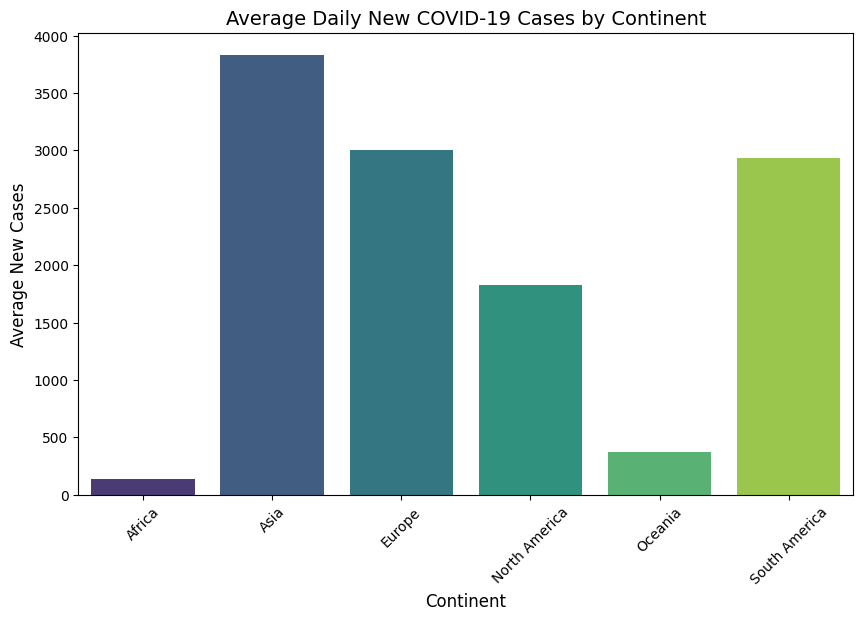

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='new_cases', data=continent_stats, palette='viridis')
plt.title('Average Daily New COVID-19 Cases by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average New Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()

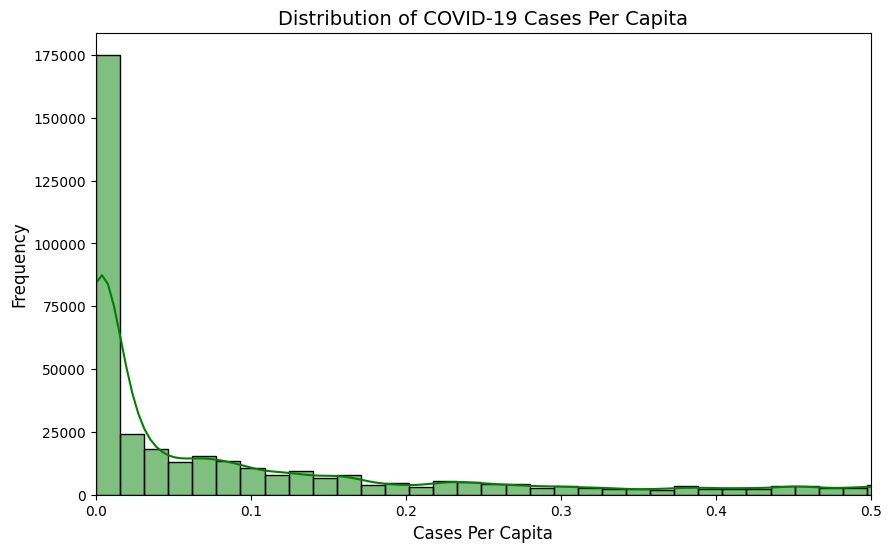

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(covid_clean['cases_per_capita'], bins=50, kde=True, color='green')
plt.title('Distribution of COVID-19 Cases Per Capita', fontsize=14)
plt.xlabel('Cases Per Capita', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 0.5)  # Limit x-axis to reasonable range
plt.show()

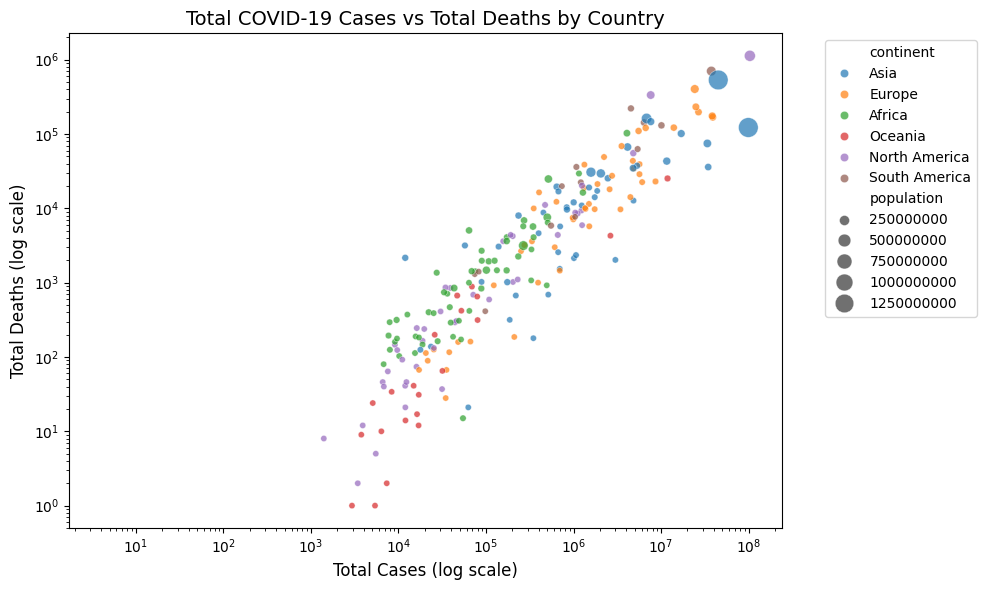

In [7]:
# Get latest data for each country
latest_data = covid_clean.sort_values('date').groupby('location').last().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cases', y='total_deaths', hue='continent', data=latest_data,
                size='population', sizes=(20, 200), alpha=0.7)
plt.title('Total COVID-19 Cases vs Total Deaths by Country', fontsize=14)
plt.xlabel('Total Cases (log scale)', fontsize=12)
plt.ylabel('Total Deaths (log scale)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()